Tugas 5 - Graph

Nama : Isnita Widyur Rahmah
NIM : 220411100048
Kelas : IF 7A

Link Project : https://github.com/taawdyy/ppw

##Install Pustaka Python
pip install networkx matplotlib digunakan untuk melakukan analisis graf serta visualisasi yang lebih baik

In [12]:
!pip install Sastrawi pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


#Impor Pustaka untuk Analisis dan Visualisasi Data dan Graf
pandas dan numpy digunakan untuk analisis data, networkx untuk bekerja dengan graf, dan matpolib untuk visualisasi data.

In [25]:
import pandas as pd
import re

from tqdm import tqdm

import pickle
import nltk
import networkx as nx
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Load Data


In [26]:
file_path = 'crawl_berita.csv'

df = pd.read_csv(file_path)

df

,Judul,Isi,Tanggal,Kategori
0,Pertemuan Sri Mulyani-Prabowo Tak Banyak Bahas...,Wakil Menteri Keuangan II Thomas Djiwandono me...,"Rabu, 11 Sep 2024 18:10 WIB",Ekonomi
1,Pebisnis Minta Jokowi Cabut Larangan Jual Roko...,Gabungan pengusaha rokok dan petani tembakau m...,"Rabu, 11 Sep 2024 17:31 WIB",Ekonomi
2,IHSG Melemah Tipis ke 7.760 Sore Ini,Indeks Harga Saham Gabungan (IHSG) ditutup di ...,"Rabu, 11 Sep 2024 16:37 WIB",Ekonomi
3,Rupiah Menguat Rp15.402 per Dolar AS Usai Deba...,Nilai tukar rupiah berada di level Rp15.402 pe...,"Rabu, 11 Sep 2024 16:24 WIB",Ekonomi
4,Sri Mulyani Usai Nonton Timnas-Australia: Teri...,Menteri Keuangan Sri MulyaniÂ berkomentar soal...,"Rabu, 11 Sep 2024 15:47 WIB",Ekonomi
...,...,...,...,...
95,Hasil Liga 1: PSM vs Persib Sama Kuat,PSM Makassar harus puas berbagi satu angka usa...,"Rabu, 11 Sep 2024 17:25 WIB",Olahraga
96,"Jokowi Beri Bonus Rp36,25 Miliar ke Peraih Med...",Presiden Joko Widodo (Jokowi) menyerahkan bonu...,"Rabu, 11 Sep 2024 17:13 WIB",Olahraga
97,Megawati Ungkap Target di Liga Korea: Jadi Pem...,Megawati Hangestri Pertiwi mengungkapkan targe...,"Rabu, 11 Sep 2024 16:49 WIB",Olahraga
98,Media Vietnam: Indonesia Buat Kejutan Besar La...,Media Vietnam memuji performa Timnas Indonesia...,"Rabu, 11 Sep 2024 16:24 WIB",Olahraga


#Konversi Teks Menjadi Huruf Kecil Menggunakan Fungsi Python
####Mengambil teks dari kolom Isi, mengubahnya menjadi huruf kecil, lalu menyimpannya dalam DataFrame baru casefolding.

In [29]:
def clean_lower(text):
    #  Memeriksa tipe data string
    if isinstance(text, str):
        return text.lower()
    return text

df['lower case'] = df['Isi'].apply(clean_lower)

# Membuat DataFrame Baru
casefolding = pd.DataFrame(df['lower case'])
casefolding

,lower case
0,wakil menteri keuangan ii thomas djiwandono me...
1,gabungan pengusaha rokok dan petani tembakau m...
2,indeks harga saham gabungan (ihsg) ditutup di ...
3,nilai tukar rupiah berada di level rp15.402 pe...
4,menteri keuangan sri mulyaniâ berkomentar soal...
...,...
95,psm makassar harus puas berbagi satu angka usa...
96,presiden joko widodo (jokowi) menyerahkan bonu...
97,megawati hangestri pertiwi mengungkapkan targe...
98,media vietnam memuji performa timnas indonesia...


#Pembersihan Tanda Baca dan Angka pada Teks Menggunakan Python
Membersihkan teks dari angka dan tanda baca, menggantinya dengan spasi, lalu menyimpannya dalam kolom tanda baca.

In [30]:
def clean_punct(text):
    #  Memeriksa tipe data string
    if isinstance(text, str):
        # Mencocokkan angka, tanda baca, dan karakter khusus
        clean_patterns = re.compile(r'[0-9]|[/(){}\[\]\|@,;_]|[^a-z ]')
        # Mengganti karakter yang cocok dengan spasi
        text = clean_patterns.sub(' ', text)
        # Menghapus spasi berlebih dan memangkas spasi di awal dan akhir
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return text

df['tanda baca'] = df['lower case'].apply(clean_punct)

df['tanda baca']

,tanda baca
0,wakil menteri keuangan ii thomas djiwandono me...
1,gabungan pengusaha rokok dan petani tembakau m...
2,indeks harga saham gabungan ihsg ditutup di le...
3,nilai tukar rupiah berada di level rp per dola...
4,menteri keuangan sri mulyani berkomentar soal ...
...,...
95,psm makassar harus puas berbagi satu angka usa...
96,presiden joko widodo jokowi menyerahkan bonus ...
97,megawati hangestri pertiwi mengungkapkan targe...
98,media vietnam memuji performa timnas indonesia...


#Normalisasi Spasi pada Teks dengan Python
####Menormalkan spasi dalam teks dengan mengganti spasi berlebihan menjadi satu spasi, lalu menyimpannya dalam kolom baru spasi.

In [31]:
def _normalize_whitespace(text):
    # Memeriksa apakah input adalah string
    if isinstance(text, str):
        # Mengganti beberapa spasi berturut-turut dengan satu spasi
        corrected = re.sub(r'\s+', ' ', text)
        return corrected.strip()
    return text

df['spasi'] = df['tanda baca'].apply(_normalize_whitespace)

df['spasi']

,spasi
0,wakil menteri keuangan ii thomas djiwandono me...
1,gabungan pengusaha rokok dan petani tembakau m...
2,indeks harga saham gabungan ihsg ditutup di le...
3,nilai tukar rupiah berada di level rp per dola...
4,menteri keuangan sri mulyani berkomentar soal ...
...,...
95,psm makassar harus puas berbagi satu angka usa...
96,presiden joko widodo jokowi menyerahkan bonus ...
97,megawati hangestri pertiwi mengungkapkan targe...
98,media vietnam memuji performa timnas indonesia...


#Penghapusan Stopwords pada Teks Bahasa Indonesia
####Menghapus stopwords menggunakan daftar stopwords dalam bahasa Indonesia dan menyimpan hasilnya di kolom baru stopwords.

In [32]:
def clean_stopwords(text):
    # Memeriksa apakah input adalah string
    if isinstance(text, str):
        # Mengambil daftar stopwords dalam bahasa Indonesia
        stopword = set(stopwords.words('indonesian'))
        # Menghapus stopwords dari teks
        text = ' '.join(word for word in text.split() if word not in stopword)
        return text.strip()
    return text

df['stopwords'] = df['spasi'].apply(clean_stopwords)

df['stopwords']

,stopwords
0,wakil menteri keuangan ii thomas djiwandono pe...
1,gabungan pengusaha rokok petani tembakau presi...
2,indeks harga saham gabungan ihsg ditutup level...
3,nilai tukar rupiah level rp dolar as rabu sore...
4,menteri keuangan sri mulyani berkomentar perfo...
...,...
95,psm makassar puas berbagi angka bermain imbang...
96,presiden joko widodo jokowi menyerahkan bonus ...
97,megawati hangestri pertiwi target musim liga v...
98,media vietnam memuji performa timnas indonesia...


#Stemming Teks Bahasa Indonesia dengan Sastrawi
####Melakukan stemming pada teks bahasa Indonesia menggunakan library Sastrawi, mengubah setiap kata menjadi bentuk dasar dan menyimpan hasilnya dalam kolom stemming.

In [33]:
def sastrawistemmer(text):
    factory = StemmerFactory()
    st = factory.create_stemmer()
    # Melakukan stemming pada setiap kata dalam teks
    text = ' '.join(st.stem(word) for word in tqdm(text.split()) if word in text)
    return text

df['stemming'] = df['stopwords'].apply(sastrawistemmer)

df['stemming']

100%|██████████| 139/139 [00:05<00:00, 27.35it/s]


,stemming
0,wakil menteri uang ii thomas djiwandono temu m...
1,gabung usaha rokok tani tembakau presiden joko...
2,indeks harga saham gabung ihsg tutup level rab...
3,nilai tukar rupiah level rp dolar as rabu sore...
4,menteri uang sri mulyani komentar performa tim...
...,...
95,psm makassar puas bagi angka main imbang lawan...
96,presiden joko widodo jokowi serah bonus atlet ...
97,megawati hangestri pertiwi target musim liga v...
98,media vietnam puji performa timnas indonesia h...


#Vectorization Teks Menggunakan CountVectorizer
####Melakukan proses vectorization pada teks yang telah di-stem menggunakan CountVectorizer, mengubah teks menjadi vektor yang merepresentasikan frekuensi kemunculan setiap kata dalam corpus.

In [34]:
count_vectorizer = CountVectorizer()

if 'stemming' in df.columns:
    corpus = df['stemming'].dropna().tolist()
else:
    raise KeyError("Kolom 'stemming' tidak ada di DataFrame")

x_count = count_vectorizer.fit_transform(corpus)
feature_names = count_vectorizer.get_feature_names_out()
x_count_df = pd.DataFrame(x_count.toarray(), columns=feature_names)

x_count_df

,abroad,absolut,acara,achmad,acu,adab,adam,adaptif,adb,adi,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Representasi Teks Menggunakan TF-IDF dan Kategori
####Melakukan proses vectorization menggunakan TF-IDF pada teks yang telah di-stem, menambahkan kategori untuk setiap dokumen, dan menyusun hasilnya dalam DataFrame.

In [23]:
tfidf_vectorizer = TfidfVectorizer()
corpus = df['stemming'].tolist()
x_tfidf = tfidf_vectorizer.fit_transform(corpus)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(x_tfidf.toarray(), columns=feature_names)
cat_df = df["Kategori"]
tfidf_df['Kategori'] = cat_df.values
tfidf_df = tfidf_df[['Kategori'] + [col for col in tfidf_df.columns if col != 'Kategori']]

tfidf_df

,Kategori,abroad,absolut,acara,achmad,acu,adab,adam,adaptif,adb,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055924,0.0,0.0
2,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.044704,0.000000,0.0,0.0
3,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.052317,0.000000,0.000000,0.0,0.000000,0.084570,0.000000,0.0,0.0
4,Ekonomi,0.0,0.054469,0.0,0.0,0.0,0.0,0.054469,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.062649,0.0,0.000000,0.000000,0.000000,0.0,0.0
96,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.040965,0.000000,0.0,0.081929,0.000000,0.000000,0.0,0.0
97,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
98,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


#Menghitung Kemiripan Dokumen Menggunakan Cosine Similarity
####Menghasilkan matriks kemiripan antar dokumen menggunakan cosine similarity berdasarkan representasi TF-IDF, yang dapat digunakan untuk analisis lebih lanjut dalam tugas-tugas seperti pengelompokan atau rekomendasi dokumen.

In [37]:
tfidf_values = tfidf_df.drop(columns=['Kategori'])
adjacency_matrix = cosine_similarity(tfidf_values)

#Konversi Matriks Kemiripan Menjadi DataFrame
####Mengonversi matriks kemiripan (adjacency matrix) menjadi DataFrame, yang memungkinkan pengguna untuk dengan mudah melihat dan menganalisis kemiripan antar dokumen.

In [38]:
adjacency_df = pd.DataFrame(adjacency_matrix)
adjacency_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.057620,0.007244,0.018526,0.047954,0.036250,0.063827,0.356395,0.288970,0.013963,...,0.009196,0.018871,0.008769,0.006498,0.011937,0.003046,0.033546,0.003652,0.014348,0.016665
1,0.057620,1.000000,0.009926,0.014925,0.037071,0.026984,0.040240,0.067151,0.066317,0.070720,...,0.018015,0.029470,0.023923,0.021924,0.007431,0.008993,0.023520,0.009961,0.033284,0.047615
2,0.007244,0.009926,1.000000,0.264444,0.012942,0.012843,0.002232,0.004625,0.004754,0.042953,...,0.022161,0.003202,0.024935,0.021047,0.005030,0.004447,0.010437,0.020791,0.009484,0.004776
3,0.018526,0.014925,0.264444,1.000000,0.020596,0.030386,0.003707,0.020200,0.027513,0.054755,...,0.045274,0.010314,0.099156,0.020149,0.007692,0.005870,0.011675,0.017947,0.032069,0.010484
4,0.047954,0.037071,0.012942,0.020596,1.000000,0.023662,0.044333,0.044414,0.054176,0.037333,...,0.147967,0.110291,0.259547,0.482766,0.124071,0.137788,0.076477,0.075374,0.281030,0.095480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003046,0.008993,0.004447,0.005870,0.137788,0.008350,0.005318,0.005355,0.009205,0.003811,...,0.084913,0.030228,0.090859,0.098015,0.149169,1.000000,0.028301,0.046570,0.091153,0.050201
96,0.033546,0.023520,0.010437,0.011675,0.076477,0.014597,0.024393,0.012601,0.006245,0.041055,...,0.046804,0.098328,0.043318,0.024293,0.005070,0.028301,1.000000,0.021359,0.033101,0.013971
97,0.003652,0.009961,0.020791,0.017947,0.075374,0.016381,0.002064,0.004976,0.004556,0.007322,...,0.040806,0.040637,0.059940,0.051436,0.039324,0.046570,0.021359,1.000000,0.072355,0.013230
98,0.014348,0.033284,0.009484,0.032069,0.281030,0.009194,0.007763,0.012984,0.023672,0.030526,...,0.168994,0.093763,0.608416,0.284264,0.055091,0.091153,0.033101,0.072355,1.000000,0.083261


#Visualisasi Graf Kemiripan Dokumen Menggunakan NetworkX
####Membuat dan memvisualisasikan graf terarah yang menunjukkan kemiripan antara dokumen, dengan node mewakili dokumen dan edge menunjukkan tingkat kemiripan yang cukup signifikan. Visualisasi ini membantu dalam memahami hubungan antar dokumen berdasarkan analisis teks.

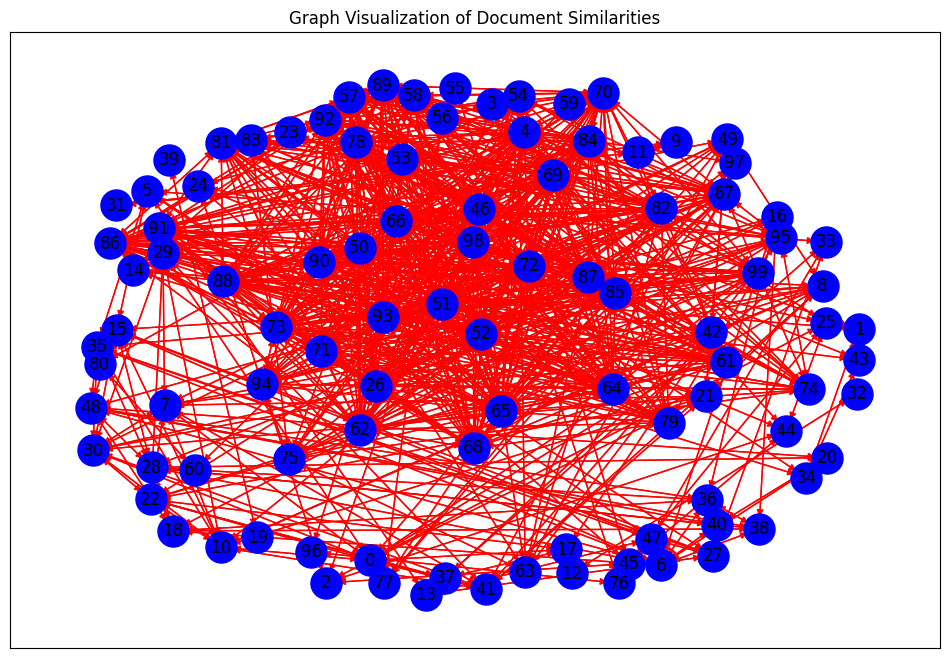

In [39]:
G_preprocessing = nx.DiGraph()

# Add nodes to the graph
for i in range(len(adjacency_matrix)):
    G_preprocessing.add_node(i)

# Add edges based on cosine similarity threshold of 0.1
for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
        similarity_preprocessing = adjacency_matrix[i][j]
        if similarity_preprocessing > 0.1 and i != j:
            G_preprocessing.add_edge(i, j)

# Generate layout for visualization
pos = nx.spring_layout(G_preprocessing, k=2)

# Draw the nodes, edges, and labels
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_preprocessing, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G_preprocessing, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G_preprocessing, pos)

# Show plot
plt.title("Graph Visualization of Document Similarities")
plt.show()

#Analisis Sentralitas Dokumen dalam Graf Kemiripan
####Menghitung ukuran sentralitas (closeness dan betweenness) untuk dokumen dalam graf terarah, menggabungkannya dalam DataFrame, dan menampilkan lima dokumen teratas berdasarkan nilai sentralitas tersebut. Analisis ini berguna untuk memahami posisi dan peran masing-masing dokumen dalam jaringan kemiripan.

In [40]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G_preprocessing)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_preprocessing, normalized=True)

# Combine the centrality measures into a DataFrame for easy comparison
centrality_df = pd.DataFrame({
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality
})

# Display the top 5 documents with the highest centrality values
centrality_df.sort_values(by=['Closeness Centrality', 'Betweenness Centrality'], ascending=False)


,Closeness Centrality,Betweenness Centrality
65,0.436199,0.011788
85,0.436199,0.011788
4,0.395810,0.004819
26,0.395810,0.004819
46,0.395810,0.004819
...,...,...
96,0.020202,0.000000
12,0.010101,0.000000
19,0.010101,0.000000
32,0.010101,0.000000
